In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# fill null with 0 in Postal Code
df['Postal Code'].fillna(0,inplace=True)
# extra step
df['Postal Code'] = df['Postal Code'].astype('int32').astype('str') # convert to int to remove .0
df['Postal Code'].replace({'0': '00000'},inplace=True)

In [5]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [6]:
# check for duplicates
df.duplicated().sum()

0

# EDA

In [7]:
# types of customers
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
# number of customers in each segment
no_of_segments = df['Segment'].value_counts().reset_index()
no_of_segments

,Segment,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


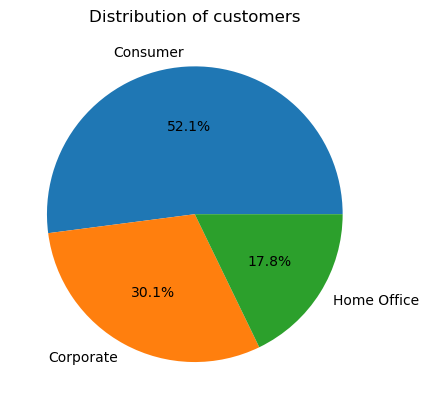

In [9]:
plt.title('Distribution of customers')
plt.pie(x=no_of_segments['count'],labels=no_of_segments['Segment'],autopct='%1.1f%%');

In [10]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [11]:
sales_by_segments = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_segments

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


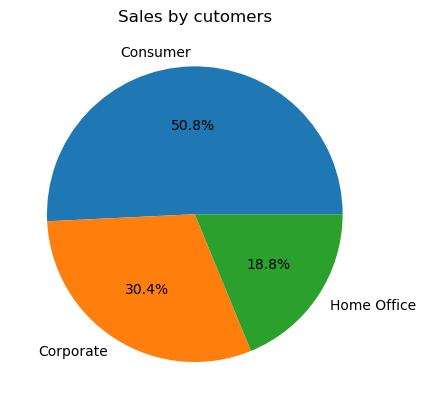

In [12]:
plt.title('Sales by cutomers')
plt.pie(x=sales_by_segments['Sales'],labels=sales_by_segments['Segment'],autopct='%1.1f%%');

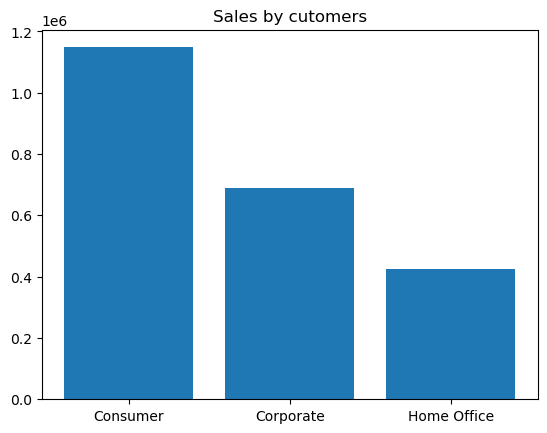

In [13]:
plt.title('Sales by cutomers')
plt.bar(x=sales_by_segments['Segment'],height=sales_by_segments['Sales']);

In [14]:
#Customer loyalty

# According to number of orders
order_freq_by_customer = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
order_freq_by_customer.rename(columns = {'Order ID':'Total Orders'},inplace=True)

repeat_customers = order_freq_by_customer[order_freq_by_customer['Total Orders'] > 1].sort_values(by='Total Orders', ascending=False)
repeat_customers.reset_index(drop=True).head(10)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,AP-10915,Arthur Prichep,Consumer,31
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


In [15]:
# According to sales
sales_by_customer = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum()
sales_by_customer.sort_values(ascending=False).reset_index().head(10)

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


In [16]:
# Mode of Shipping
ship_modes = df['Ship Mode'].value_counts().reset_index()
ship_modes

,Ship Mode,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


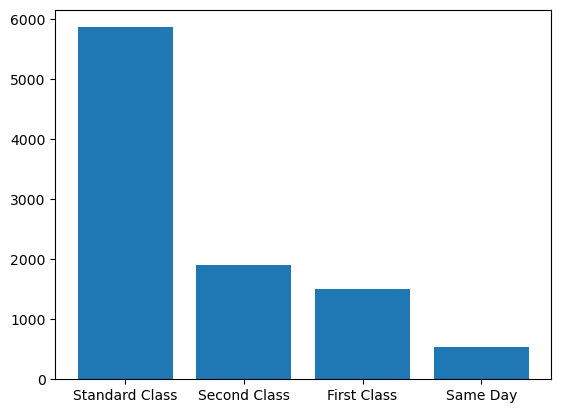

In [17]:
plt.bar(x=ship_modes['Ship Mode'],height=ship_modes['count']);

In [18]:
# number of customers by state
states = df['State'].value_counts().reset_index()
states.head(5)

,State,count
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504


In [19]:
# number of customers by city
cities = df['City'].value_counts().reset_index()
cities.head(5)

,City,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426


In [20]:
#Sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_sales= state_sales.reset_index()
state_sales.head(10)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [21]:
#Sales by City
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales = city_sales.reset_index()
city_sales.head(10)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


In [22]:
#Product Ananlysis

df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [23]:
df.groupby('Category')['Sub-Category'].nunique().reset_index()

,Category,Sub-Category
0,Furniture,4
1,Office Supplies,9
2,Technology,4


In [24]:
df.groupby(['Category','Sub-Category'])['Row ID'].count().reset_index().rename(columns={'Row ID':'no_items'})

,Category,Sub-Category,no_items
0,Furniture,Bookcases,226
1,Furniture,Chairs,607
2,Furniture,Furnishings,931
3,Furniture,Tables,314
4,Office Supplies,Appliances,459
5,Office Supplies,Art,785
6,Office Supplies,Binders,1492
7,Office Supplies,Envelopes,248
8,Office Supplies,Fasteners,214
9,Office Supplies,Labels,357


In [25]:
#Sales by category
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
cat_sales

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


In [26]:
#Sales by sub-category
subcat_sales = df.groupby(df['Sub-Category'])['Sales'].sum().sort_values().reset_index()
subcat_sales

,Sub-Category,Sales
0,Fasteners,3001.9600
1,Labels,12347.7260
2,Envelopes,16128.0460
3,Art,26705.4100
4,Supplies,46420.3080
5,Paper,76828.3040
6,Furnishings,89212.0180
7,Appliances,104618.4030
8,Bookcases,113813.1987
9,Copiers,146248.0940


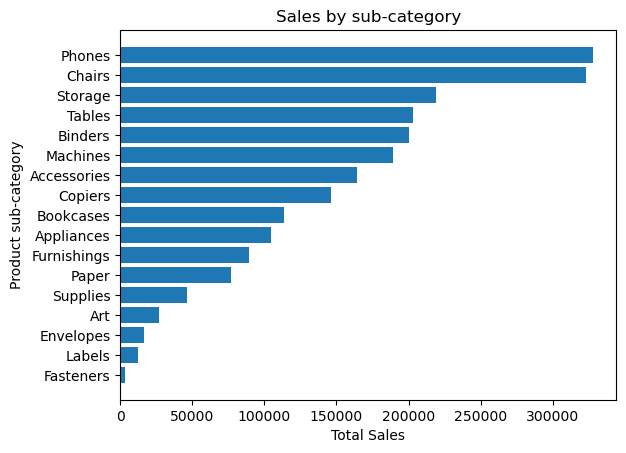

In [27]:
plt.title('Sales by sub-category')
plt.xlabel('Total Sales')
plt.ylabel('Product sub-category')

plt.barh(y=subcat_sales['Sub-Category'],width=subcat_sales['Sales']);

In [28]:
# Sales
yearly_sales = df.groupby([df['Order Date'].dt.year])['Sales'].sum().reset_index()
yearly_sales


,Order Date,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


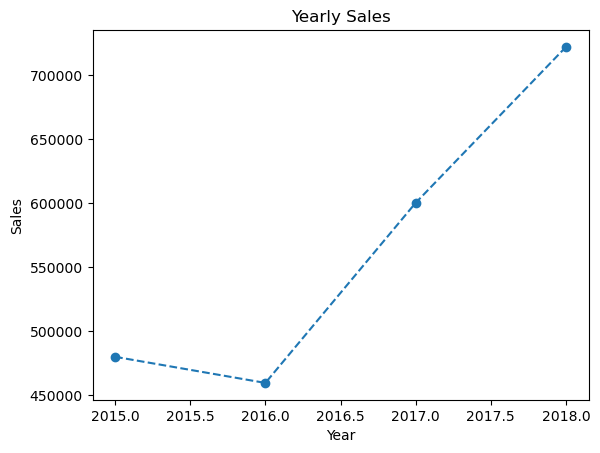

In [29]:
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.plot(yearly_sales['Order Date'],yearly_sales['Sales'],marker = 'o',linestyle='--');

In [30]:
# Quarter Sales
#year2018_sales = df[df['Order Date'].dt.year == 2018]
#year2018_sales = year2018_sales.groupby([df['Order Date'].dt.quarter])['Sales'].sum().reset_index()
#year2018_sales.rename(columns={'Order Date':'Quarter'},inplace=True)

#OR
year2018_sales = df[df['Order Date'].dt.year == 2018]
year2018_sales = year2018_sales.resample('Q',on = 'Order Date')['Sales'].sum().reset_index()
year2018_sales.rename(columns={'Order Date':'Quarter'},inplace=True)
year2018_sales

,Quarter,Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


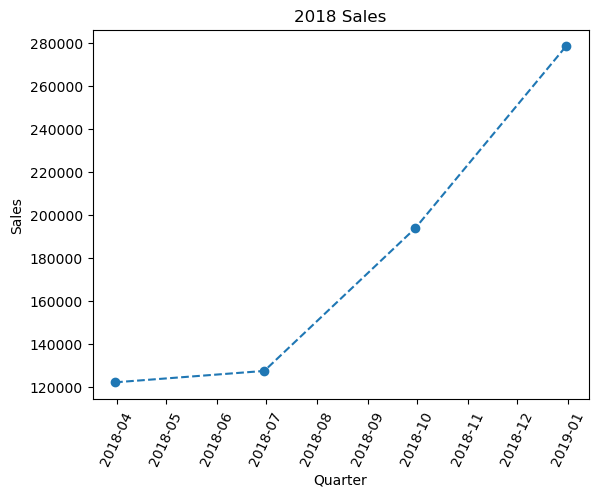

In [31]:
plt.title('2018 Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.xticks(rotation = 65)

plt.plot(year2018_sales['Quarter'],year2018_sales['Sales'],marker = 'o',linestyle='--');

In [32]:
year2018_sales = df[df['Order Date'].dt.year == 2018]
year2018_sales = year2018_sales.resample('M',on = 'Order Date')['Sales'].sum().reset_index()
year2018_sales.rename(columns={'Order Date':'Month'},inplace=True)
year2018_sales

,Month,Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


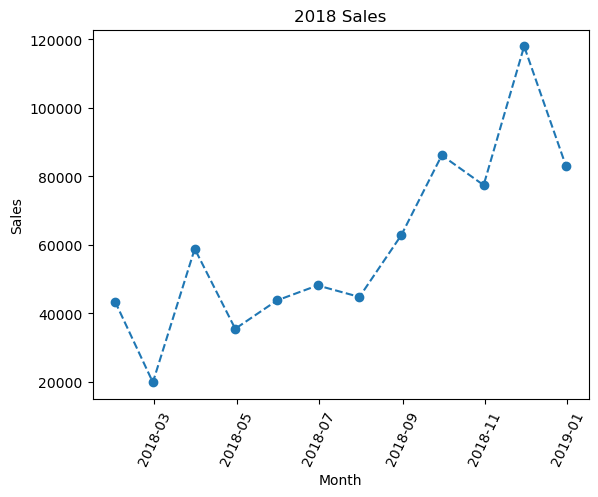

In [33]:
plt.title('2018 Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(rotation = 65)

plt.plot(year2018_sales['Month'],year2018_sales['Sales'],marker = 'o',linestyle='--');

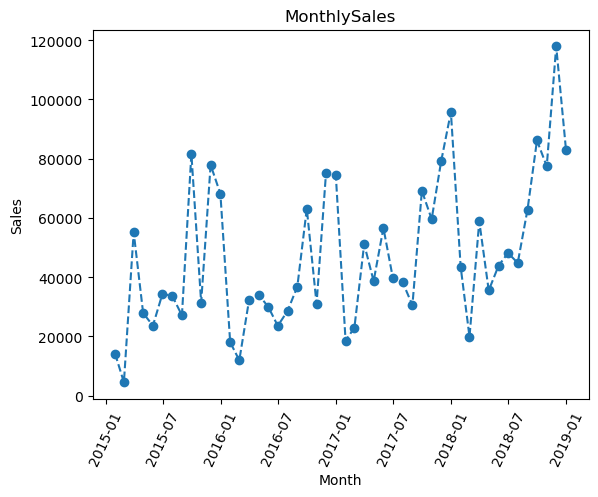

In [34]:
#All years by month
year_sales = df.resample('M',on = 'Order Date')['Sales'].sum().reset_index()

plt.title('MonthlySales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(rotation = 65)

plt.plot(year_sales['Order Date'],year_sales['Sales'],marker = 'o',linestyle='--');
